In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os

In [2]:
eosdir_pos = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-positive/'
eosdir_neg = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-negative/'

df_true = pd.DataFrame()
df_data = pd.DataFrame()

print('Processing + charge')
for f in os.listdir(eosdir_pos):
    if 'recon' in f:
        continue
        
    df_true = pd.concat([df_true,pd.read_csv(eosdir_pos+f)])
    df_data = pd.concat([df_data,pd.read_csv("unflipped-positive/recon1Dx_"+f.split('_')[1])])
        
print('Processing - charge')
for f in os.listdir(eosdir_neg):
    if 'recon' in f:
        continue
        
    df_true = pd.concat([df_true,pd.read_csv(eosdir_neg+f)])
    df_data = pd.concat([df_data,pd.read_csv("unflipped-negative/recon1Dx_"+f.split('_')[1])])
    

Processing + charge
Processing - charge


In [3]:
threshold = 0.3 # GeV

In [4]:
df_true

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane
0,187.960602,5.819384,100.0,-3.201757,-0.015797,-0.738721,37967.0,-0.963780,0.740845,4.334190,0.021384,4.750171,-28.748886
1,9.408124,13.200923,100.0,0.826235,0.026282,-1.371215,6538.0,0.884188,1.372050,-0.602557,-0.019167,14.159270,39.535967
2,84.732826,10.721191,100.0,-0.306291,0.083919,-0.791659,5891.0,4.285150,0.795417,0.386898,-0.106004,16.021390,65.387944
3,-256.300446,-5.275360,100.0,7.125055,0.304351,-1.834402,28788.0,5.466930,1.858530,-3.884130,-0.165913,3.020286,-62.093969
4,-46.793102,3.082501,100.0,-0.121722,-0.072646,-1.224502,7427.0,-1.060050,1.226800,0.099405,0.059327,0.116152,-51.763367
5,-12.022916,-0.346309,100.0,0.198962,-0.047514,-1.003095,5633.0,-0.717953,1.004000,-0.198348,0.047367,-2.714679,-2.105510
6,79.481529,-2.324636,100.0,-0.616500,-0.051627,-1.965254,7415.0,-0.217131,1.966060,0.313700,0.026270,-3.638130,63.796534
7,-71.720123,9.775104,100.0,0.713365,-0.114071,-2.398818,7673.0,-0.579840,2.401100,-0.297382,0.047553,7.397454,-56.851029
8,234.219467,-3.023519,100.0,-7.527213,0.007721,-1.765795,31725.0,0.974216,1.767740,4.262790,-0.004373,-2.804892,21.079975
9,-5.842640,11.654429,100.0,-0.131889,0.007982,-0.729634,7560.0,2.083850,0.729589,0.180760,-0.010940,12.201416,-14.880665


In [5]:
df_pos_low = df_data[(abs(df_true['pt'])<threshold) & (df_true['pt']>0)]
df_neg_low = df_data[(abs(df_true['pt'])<threshold) & (df_true['pt']<0)]
df_high = df_data[df_true['pt']>threshold]

In [6]:
def xprofile():
    
    df1 = df_data[abs(np.arctan(1.0/df_true['cotAlpha'])*180/np.pi>60)]
    df2 = df_data[(abs(np.arctan(1.0/df_true['cotAlpha'])*180/np.pi)<60) & (abs(np.arctan(1.0/df_true['cotAlpha'])*180/np.pi)>30)]
    df3 = df_data[abs(np.arctan(1.0/df_true['cotAlpha'])*180/np.pi<30)]

    x1 = np.repeat(a=range(0,21),repeats=len(df1))
    x2 = np.repeat(a=range(0,21),repeats=len(df2))
    x3 = np.repeat(a=range(0,21),repeats=len(df3))

    mean1 = []
    std1 = []
    
    mean2 = []
    std2 = []
    
    mean3 = []
    std3 = []

    for i in range(0,21):
        mean1 += [np.mean(df1[str(i)])]
        std1 += [np.std(df1[str(i)])]
    
        mean2 += [np.mean(df2[str(i)])]
        std2 += [np.std(df2[str(i)])]
        
        mean3 += [np.mean(df3[str(i)])]
        std3 += [np.std(df3[str(i)])]
        
    mean1 = np.array(mean1)
    mean2 = np.array(mean2)
    mean3 = np.array(mean3)
    
    std1 = np.array(std1)
    std2 = np.array(std2)
    std3 = np.array(std3)
    
    #plt.errorbar(x=range(0,13),y=mean_pos_low,yerr=std_pos_low,marker='o',linestyle='',color='red')
    #plt.errorbar(x=range(0,13),y=mean_neg_low,yerr=std_neg_low,marker='o',linestyle='',color='blue')
    #plt.errorbar(x=range(0,13),y=mean_high,yerr=std_high,marker='o',linestyle='',color='black')
    
    #hist = plt.hist2d(x=x_pos_low,y=np.array(df_pos_low).flatten(),bins=[range(0,14),np.linspace(200,10000,100)],norm=colors.LogNorm())
    #plt.show()
    #hist = plt.hist2d(x=x_neg_low,y=np.array(df_neg_low).flatten(),bins=[range(0,14),np.linspace(200,10000,100)],norm=colors.LogNorm())
    #plt.show()
    #hist = plt.hist2d(x=x_high,y=np.array(df_high).flatten(),bins=[range(0,14),np.linspace(200,10000,100)],norm=colors.LogNorm())
    #plt.show()
    
    plt.hist(x=range(0,21),weights=mean1,histtype='step',bins=21,density=True,color='red',label=r'$|\alpha|<30^\circ$')
    plt.hist(x=range(0,21),weights=mean2,histtype='step',bins=21,density=True,color='blue',label=r'$30^\circ<|\alpha|<60^\circ$')
    plt.hist(x=range(0,21),weights=mean3,histtype='step',bins=21,density=True,color='black',label=r'$|\alpha|>60^\circ$')
    
    plt.xlabel('x [pixels]')
    plt.ylabel('Fraction of cluster charge')
    plt.suptitle(r'Mean cluster shape')
    
    plt.legend(frameon=False)
    plt.xlim(0,21)
    
    plt.savefig('dataset678/xprofile.pdf',bbox_inches='tight')
    plt.show()
    

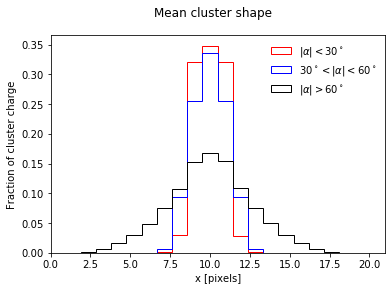

In [7]:
xprofile()
